In [1]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('../data/Churn_Modelling.csv', delimiter=',')
df.shape
df_copy = df.copy()


In [3]:
df_copy = df_copy.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

<Axes: xlabel='IsActiveMember', ylabel='count'>

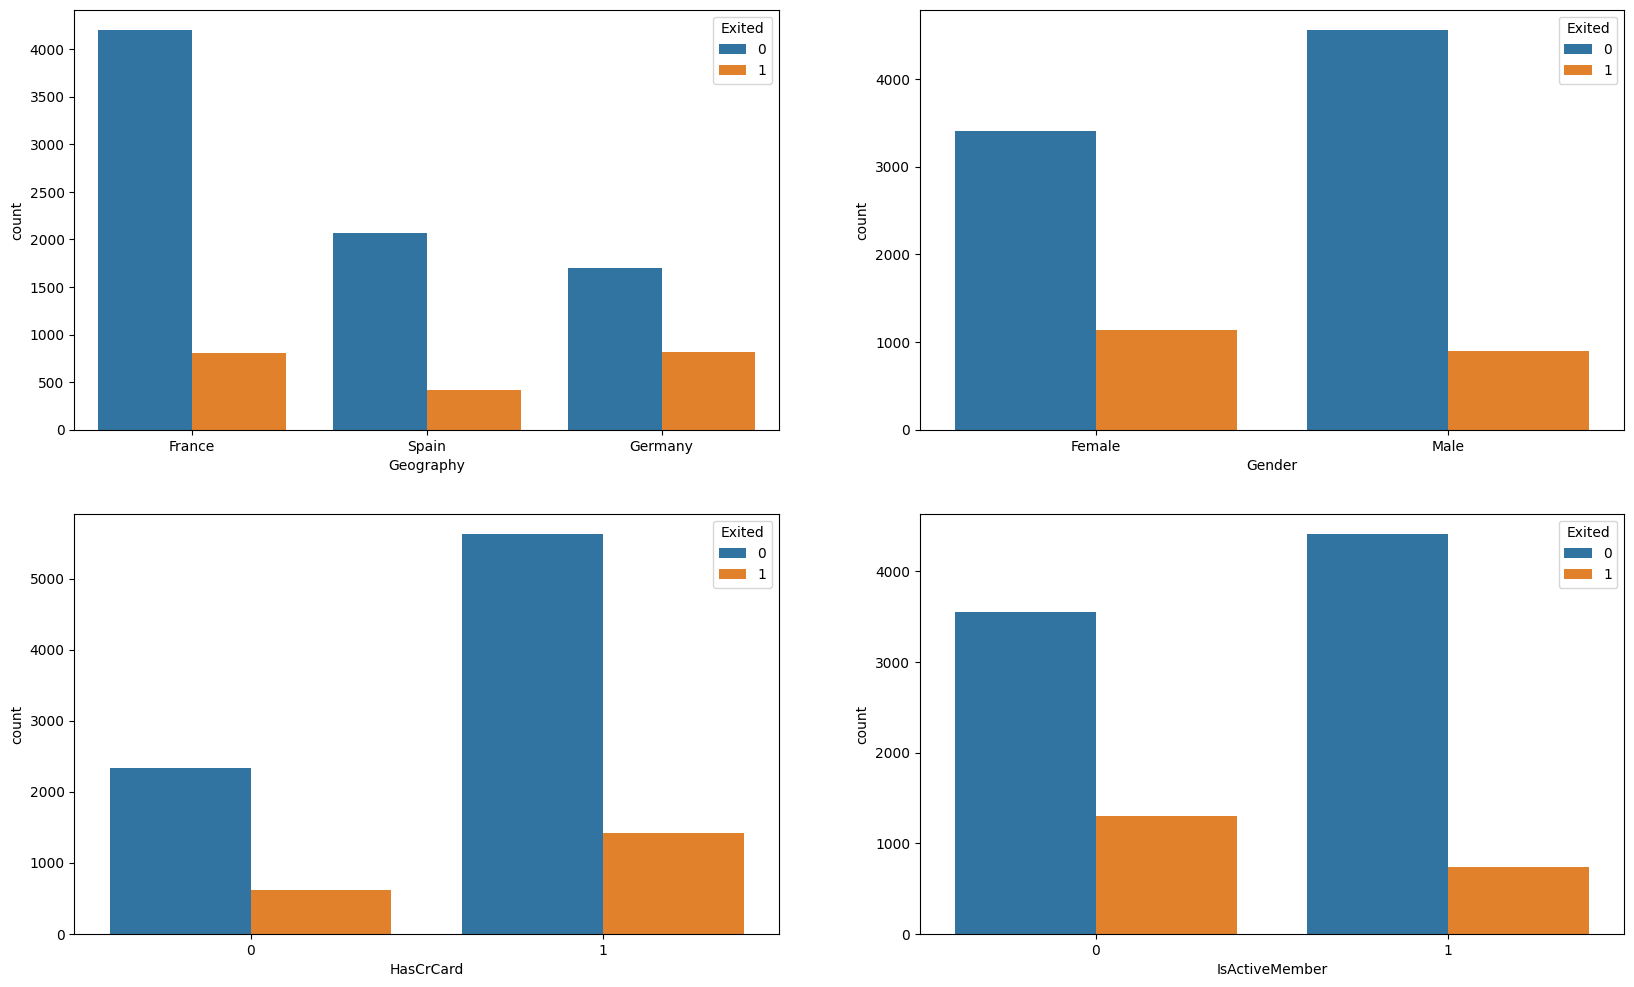

In [4]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

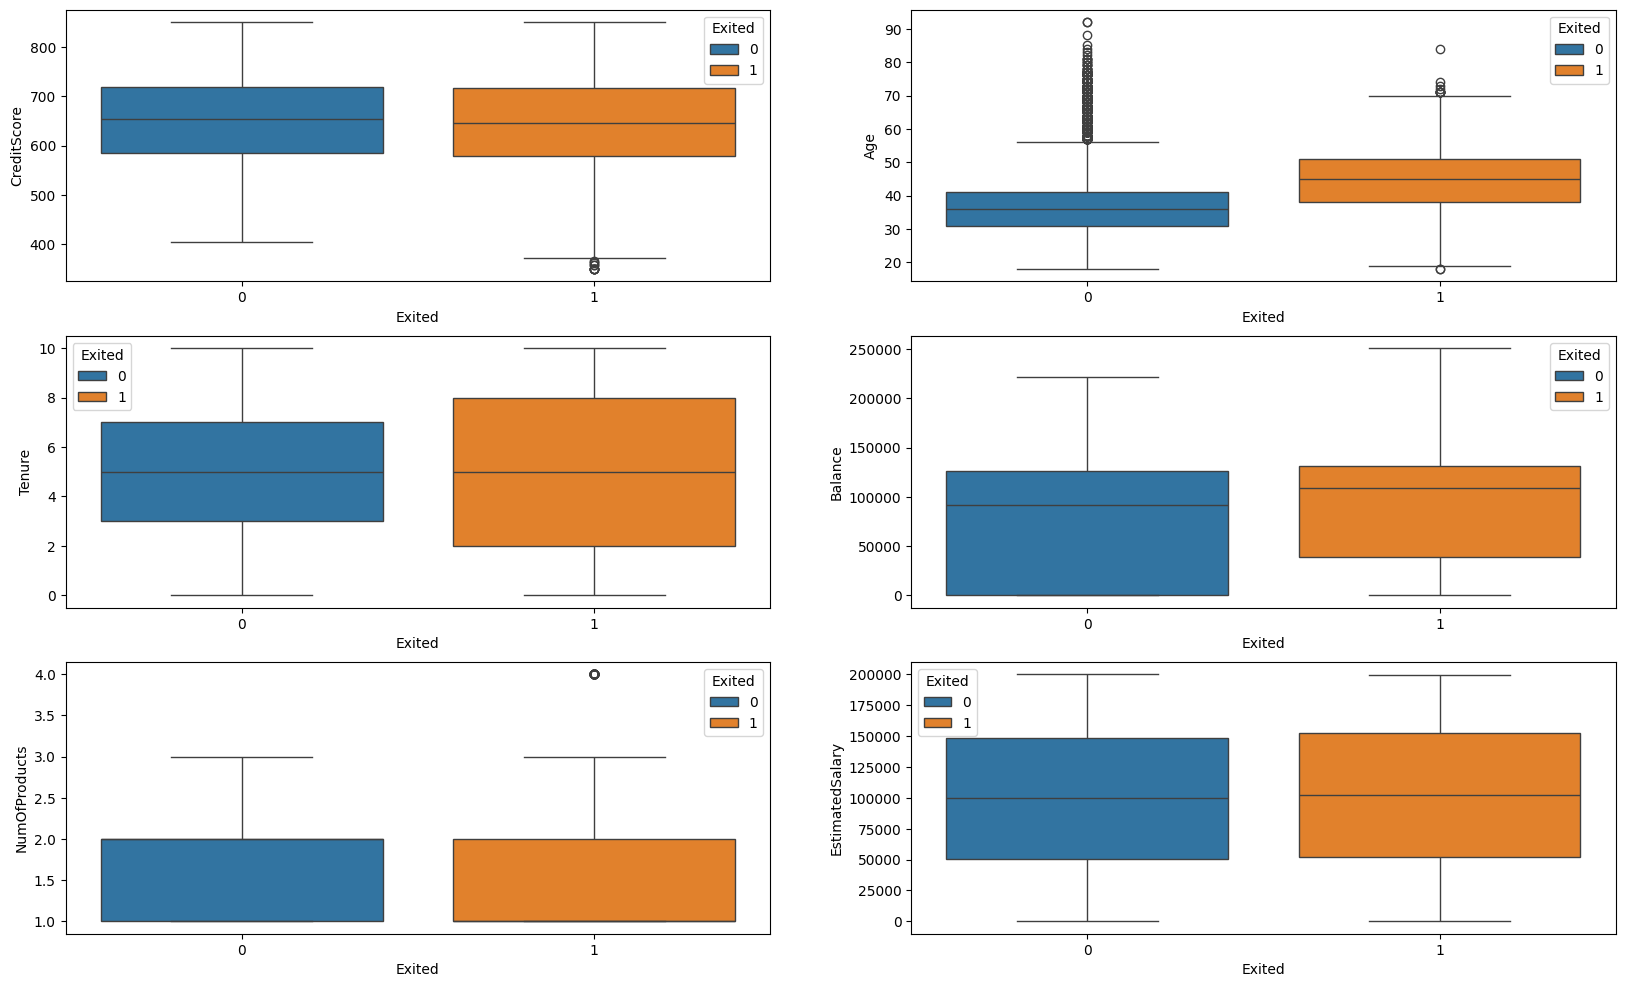

In [5]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

(-1.0, 5.0)

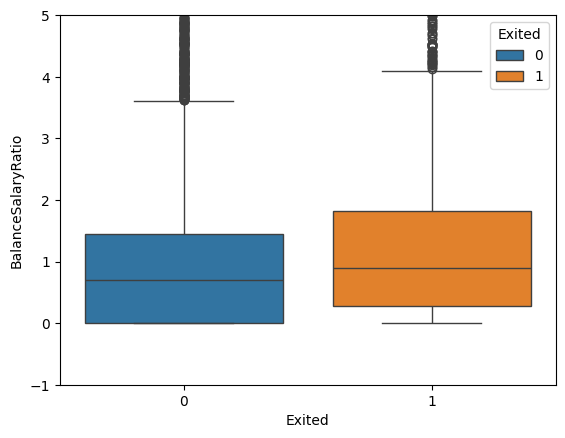

In [6]:
df_copy['BalanceSalaryRatio'] = df_copy.Balance/df_copy.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_copy)
plt.ylim(-1, 5)

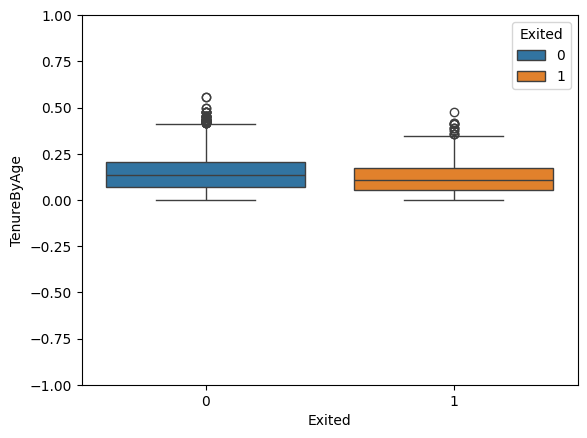

In [7]:
df_copy['TenureByAge'] = df_copy.Tenure/(df_copy.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_copy)
plt.ylim(-1, 1)
plt.show()

In [8]:
df_copy['CreditScoreGivenAge'] = df_copy.CreditScore/(df_copy.Age)

In [9]:
df_copy.shape


(10000, 14)

In [10]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_copy = df_copy[['Exited'] + continuous_vars + cat_vars]
df_copy.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [11]:
df_copy.loc[df_copy.HasCrCard == 0, 'HasCrCard'] = -1
df_copy.loc[df_copy.IsActiveMember == 0, 'IsActiveMember'] = -1
df_copy.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [12]:

lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if df_copy[i].dtype == object:  # Use `object` directly
        for j in df_copy[i].unique():
            df_copy[i+'_'+j] = np.where(df_copy[i] == j, 1, -1)
        remove.append(i)
df_copy = df_copy.drop(remove, axis=1)
df_copy.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,-1,1,-1,1,-1


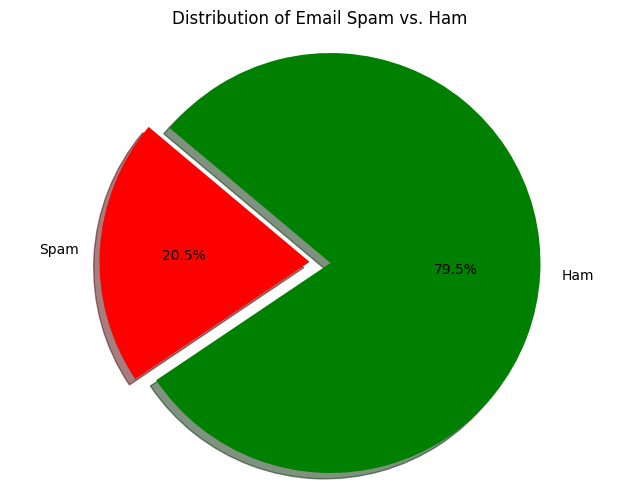

In [13]:

from sklearn.model_selection import train_test_split
df_copy.shape
X = df_copy.loc[:, df_copy.columns != 'Exited']
y = df_copy.Exited
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
num_spam = y_train[y_train == 1].shape[0]
num_ham = y_train[y_train == 0].shape[0]

import matplotlib.pyplot as plt
labels = ['Spam', 'Ham']
sizes = [num_spam, num_ham]
colors = ['red', 'green']
explode = (0.1, 0)  # Tách phần Spam ra một chút

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Distribution of Email Spam vs. Ham')
plt.show()



In [14]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Đếm số lượng mẫu trong mỗi lớp
num_spam1 = sum(y_train_resampled == 1)
num_ham1 = sum(y_train_resampled == 0)

# Tạo DataFrame từ dữ liệu đã oversampled
df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)
df_resampled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male,Exited
0,673,59,0,178058.06,2,21063.71,8.453310,0.000000,11.406780,-1,1,1,-1,-1,-1,1,1
1,850,41,8,60880.68,1,31825.84,1.912932,0.195122,20.731707,1,-1,-1,-1,1,-1,1,0
2,725,31,6,0.00,1,61326.43,0.000000,0.193548,23.387097,-1,-1,1,-1,-1,1,-1,0
3,644,33,7,174571.36,1,43943.09,3.972669,0.212121,19.515152,-1,1,1,-1,-1,-1,1,0
4,703,29,9,0.00,2,50679.48,0.000000,0.310345,24.241379,1,-1,-1,1,-1,-1,1,0


In [15]:
df_resampled.shape

(11920, 17)

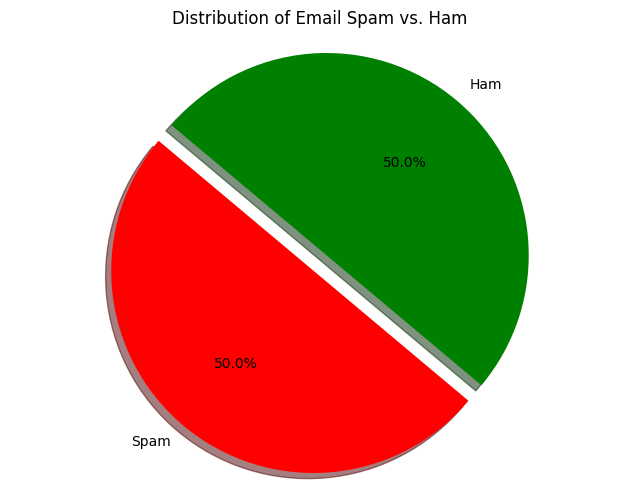

In [16]:
import matplotlib.pyplot as plt
labels = ['Spam', 'Ham']
sizes = [num_spam1, num_ham1]
colors = ['red', 'green']
explode = (0.1, 0)  # Tách phần Spam ra một chút

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Distribution of Email Spam vs. Ham')
plt.show()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 
            'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge', 'HasCrCard', 
            'IsActiveMember', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 
            'Gender_Male', 'Gender_Female']
X = df_resampled[features]
y = df_resampled['Exited']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng thuật toán K-means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Lấy nhãn cụm
labels = kmeans.labels_
df_resampled['Cluster'] = labels

# Hiển thị kết quả phân cụm
print(df_resampled.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0          673   59       0  178058.06              2         21063.71   
1          850   41       8   60880.68              1         31825.84   
2          725   31       6       0.00              1         61326.43   
3          644   33       7  174571.36              1         43943.09   
4          703   29       9       0.00              2         50679.48   

   BalanceSalaryRatio  TenureByAge  CreditScoreGivenAge  HasCrCard  \
0            8.453310     0.000000            11.406780         -1   
1            1.912932     0.195122            20.731707          1   
2            0.000000     0.193548            23.387097         -1   
3            3.972669     0.212121            19.515152         -1   
4            0.000000     0.310345            24.241379          1   

   IsActiveMember  Geography_France  Geography_Spain  Geography_Germany  \
0               1                 1               -1       

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Tạo danh sách để lưu các mô hình SVM cho từng cụm
svm_models = []
scalers = []  # Để lưu scaler cho mỗi cụm

# Lặp qua từng cụm và huấn luyện mô hình SVM
for cluster in range(kmeans.n_clusters):
    # Lọc dữ liệu theo cụm hiện tại
    cluster_data = df_resampled[df_resampled['Cluster'] == cluster]
    X_cluster = cluster_data[features]
    y_cluster = cluster_data['Exited']
    
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.3, random_state=0)
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Huấn luyện mô hình SVM
    # svm = SVC(kernel='linear', random_state=0)
    # svm.fit(X_train_scaled, y_train)
    
    RF_clf = RandomForestClassifier()
    RF_clf.fit(X_train_scaled, y_train)
    
    
    # Đánh giá mô hình
    y_pred = RF_clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for cluster {cluster}: {accuracy}')
    print(classification_report(y_test, y_pred))
    
    # Lưu mô hình và scaler
    svm_models.append(RF_clf)
    scalers.append(scaler)


Accuracy for cluster 0: 0.9165487977369166
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       523
           1       0.96      0.91      0.93       891

    accuracy                           0.92      1414
   macro avg       0.91      0.92      0.91      1414
weighted avg       0.92      0.92      0.92      1414

Accuracy for cluster 1: 0.8726450640542577
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       675
           1       0.89      0.84      0.87       652

    accuracy                           0.87      1327
   macro avg       0.87      0.87      0.87      1327
weighted avg       0.87      0.87      0.87      1327

Accuracy for cluster 2: 0.9318181818181818
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       606
           1       0.99      0.76      0.86       230

    accuracy                           0.93       836